In [15]:
import warnings
warnings.filterwarnings('ignore')

# load conn mats

In [16]:
import pandas as pd
import numpy as np
from nilearn.connectome import ConnectivityMeasure

In [17]:
# in data/ts/ we don't have cerebellum regions included. only 1012 regions.
def ts(subject, epoch): return pd.read_csv('data/ts/ts_'+str(subject)+'_'+epoch+'.csv')

def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [21]:
cmat(ts(1, 'baseline'))

array([[ 1.00790368,  0.23419984,  0.50892185, ...,  0.1682564 ,
         0.19567103,  0.07654431],
       [ 0.23419984,  1.00794046,  0.23882741, ...,  0.01707564,
        -0.02505779, -0.01767422],
       [ 0.50892185,  0.23882741,  0.99919792, ...,  0.30667607,
         0.14315145,  0.01984748],
       ...,
       [ 0.1682564 ,  0.01707564,  0.30667607, ...,  0.99593425,
         0.38450496,  0.25093269],
       [ 0.19567103, -0.02505779,  0.14315145, ...,  0.38450496,
         1.00050146,  0.17830201],
       [ 0.07654431, -0.01767422,  0.01984748, ...,  0.25093269,
         0.17830201,  0.98917187]])

In [22]:
def cmat_cnt(subject, epoch):
    return pd.read_csv('data/cmat/cnt/cnt_'+str(subject)+'_'+epoch+'.csv').to_numpy()

In [23]:
cmat_cnt(1, 'baseline')

array([[0.3123488 , 0.03257589, 0.09277816, ..., 0.05028458, 0.05440005,
        0.01632614],
       [0.03257589, 0.298927  , 0.06895158, ..., 0.01932624, 0.00141929,
        0.00779954],
       [0.09277816, 0.06895158, 0.30216531, ..., 0.08236278, 0.04333789,
        0.00405652],
       ...,
       [0.05028458, 0.01932624, 0.08236278, ..., 0.78397369, 0.39518461,
        0.10908205],
       [0.05440005, 0.00141929, 0.04333789, ..., 0.39518461, 0.69609506,
        0.0728637 ],
       [0.01632614, 0.00779954, 0.00405652, ..., 0.10908205, 0.0728637 ,
        0.68281566]])

In [28]:
EPOCHS = ['baseline', 'early', 'late']
# EPOCH_REF = 'baseline'

In [32]:
subjects = pd.read_csv('data/subjects.csv')

# fit umap

In [29]:
import umap

reducer = umap.UMAP(random_state=42)

## original

In [34]:
cmats_stacked = np.stack(cmat(ts(s , e)).flatten() for s in subjects.int_id for e in EPOCHS)
cmats_stacked.shape

(108, 1024144)

In [36]:
embedding = reducer.fit_transform(cmats_stacked)
embedding.shape

(108, 2)

In [42]:
se = [[s, e] for s in subjects.int_id for e in EPOCHS]
se = pd.DataFrame(se, columns=['subject', 'epoch'])
emb = pd.DataFrame(embedding, columns=['e1', 'e2'])
emb = pd.concat([se, emb], axis=1)

## centered

In [43]:
reducer = umap.UMAP(random_state=42)

In [44]:
cmats_cnt_stacked = np.stack(cmat_cnt(s , e).flatten() for s in subjects.int_id for e in EPOCHS)

In [45]:
embedding = reducer.fit_transform(cmats_cnt_stacked)

In [46]:
emb_cnt = pd.DataFrame(embedding, columns=['e1', 'e2'])
emb_cnt = pd.concat([se, emb_cnt], axis=1)

# plot 2d

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sns.set(
    # style='white', context='notebook',
    rc={'figure.figsize': (7, 5)})
sns.scatterplot(data=emb.astype({'subject': str}),
                x='e1', y='e2',
                hue='subject', style='epoch',
                legend=False)

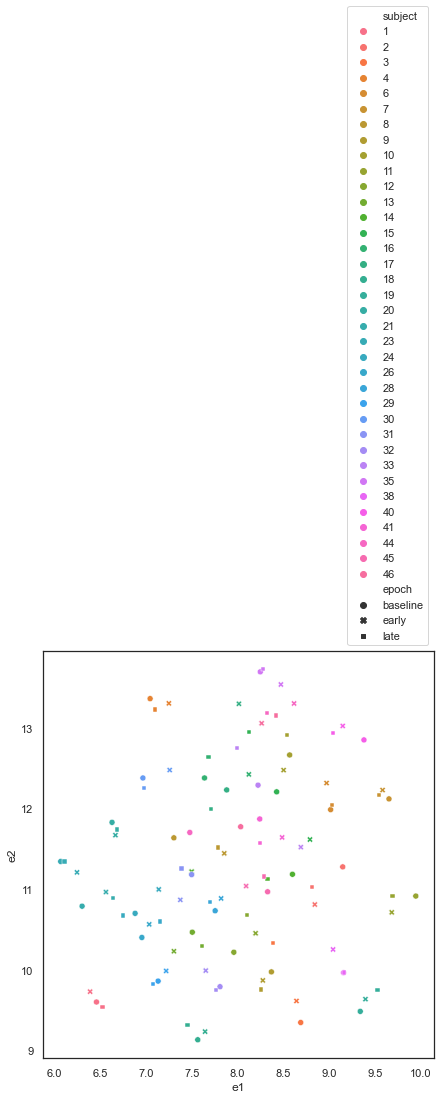

In [84]:
sns.set(style='white', context='notebook',rc={'figure.figsize': (7, 7.5)})
ax = sns.scatterplot(data=emb.astype({'subject': str}),
                x='e1', y='e2',
                hue='subject', style='epoch',
                legend=True,
                )
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))
plt.savefig("test.png", dpi=300)

## centered

In [64]:
sns.set(
    # style='white', context='notebook',
    rc={'figure.figsize': (7, 5)})
sns.scatterplot(data=emb_cnt.astype({'subject': str}),
                x='e1', y='e2',
                hue='subject', style='epoch',
                legend=False)

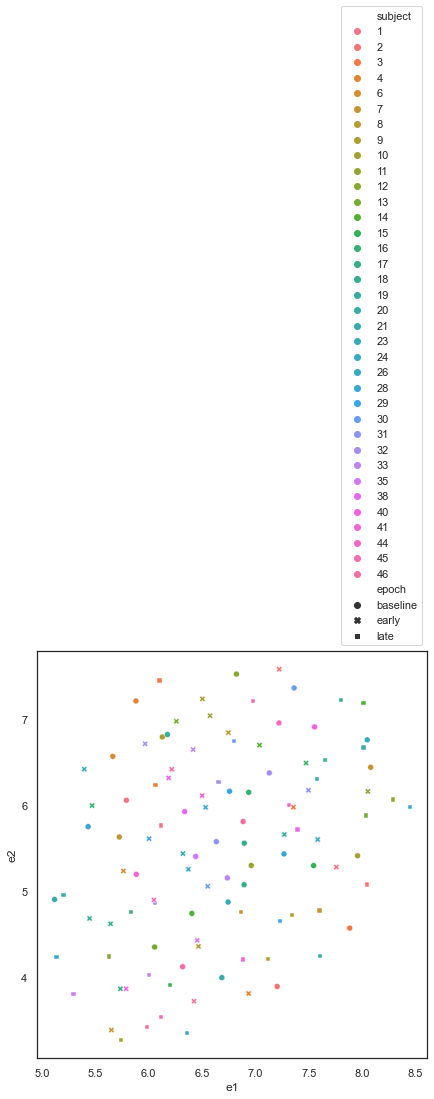

In [85]:
sns.set(style='white', context='notebook',rc={'figure.figsize': (7, 7.5)})
ax = sns.scatterplot(data=emb_cnt.astype({'subject': str}),
                x='e1', y='e2',
                hue='subject', style='epoch',
                legend=True,
                )
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))
plt.savefig("test.png", dpi=300)